In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

from data_reader import read_data
from data_preprocessing import preprocess_data
from feature_extractor import extract_features

%matplotlib inline

In [2]:
# data = preprocess_data(read_data(), limit=1000000, normalize_text=True, save_file='result.cropped.1m.tsv', verbose=True)
data = preprocess_data(read_data('result.cropped.1m.tsv'))

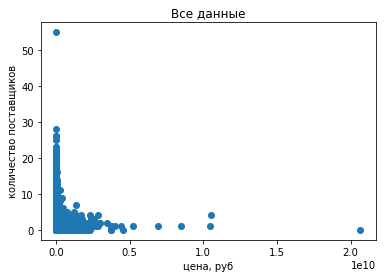

In [3]:
plt.scatter(data['RubPrice'], data['SuppliersCount'])
plt.title("Все данные")
plt.xlabel("цена, руб")
plt.ylabel("количество поставщиков")
plt.show()

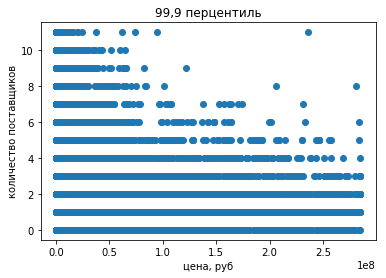

In [4]:
data_nn = data[(~np.isnan(data['RubPrice'])) & (~np.isnan(data['SuppliersCount']))]
data95 = data_nn[(data_nn['RubPrice'] < np.percentile(data_nn['RubPrice'], 99.9)) &
                 (data_nn['SuppliersCount'] < np.percentile(data_nn['SuppliersCount'], 99.9))]
plt.scatter(data95['RubPrice'], data95['SuppliersCount'])
plt.title("99,9 перцентиль")
plt.xlabel("цена, руб")
plt.ylabel("количество поставщиков")
plt.show()

In [5]:
data.SuppliersCount.value_counts()

1.0     275260
0.0     264708
2.0     174380
3.0     106100
4.0      66942
5.0      42122
6.0      24683
7.0      13677
8.0       7519
9.0       4011
10.0      2117
11.0      1099
12.0       589
13.0       339
14.0       172
15.0       113
16.0        58
17.0        38
18.0        25
19.0        15
20.0         9
21.0         8
22.0         3
23.0         2
26.0         2
25.0         1
55.0         1
28.0         1
Name: SuppliersCount, dtype: int64

In [6]:
len(data['CurrencyCode'].unique())

5

In [7]:
len(data['ProcedureDisplayName'].unique())

27

In [12]:
data_unbalanced = data.head(1000000)
features_unbalanced, pca_ = extract_features(data_unbalanced, use_pca=True,
                                             title_features=1000, pca_features=500, verbose=True)

[2018-04-16 18:09:22.009253]: start pca
[2018-04-16 18:14:05.995054]: end pca
393
0.900141930318


Text(0,0.5,'explained_variance_')

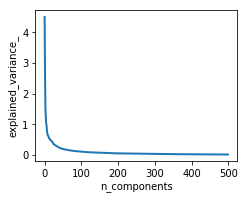

In [13]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca_.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [ ]:
def ngrams(data, column):
    return data.columns[data.columns.str.startswith(f'Ngrams_{column}_')].tolist()

def onehots(data, column):
    return data.columns[data.columns.str.startswith(f'OneHot_{column}_')].tolist()

def pcas(data, column):
    return data.columns[data.columns.str.startswith(f'pca_{column}_')].tolist()

In [ ]:
X = features_unbalanced[ngrams(features_unbalanced, 'Title') + ['RubPrice']]
y = data_unbalanced['SuppliersCount']
len(X), len(y)

In [ ]:
X_pca = features_unbalanced[pcas(features_unbalanced, 'Title') + ['RubPrice']]

In [12]:
cross_val_score(LinearRegression(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

-2.8167388215190887

In [13]:
cross_val_score(LinearRegression(), X_pca, y, cv=3, scoring='neg_mean_squared_error').mean()

-3.0682335907965181

In [14]:
cross_val_score(DummyRegressor(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

-3.7434226058458364

In [15]:
# from sklearn.svm import LinearSVR
# cross_val_score(LinearSVR(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [16]:
# from sklearn.ensemble import RandomForestRegressor
# cross_val_score(RandomForestRegressor(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [17]:
X = features_unbalanced[ngrams(features_unbalanced, 'Title') + ngrams(features_unbalanced, 'ProcedureDisplayName')]
cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

-2.5032124735713794

In [18]:
X = features_unbalanced[pcas(features_unbalanced, 'Title') + ngrams(features_unbalanced, 'ProcedureDisplayName')]
cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

-2.6275974605861463

In [19]:
X = features_unbalanced[ngrams(features_unbalanced, 'Title') + onehots(features_unbalanced, 'ProcedureDisplayName')]
cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

-2.503213692341967

In [ ]:
X = features_unbalanced[pcas(features_unbalanced, 'Title') + onehots(features_unbalanced, 'ProcedureDisplayName')]
cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [21]:
# cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_absolute_error').mean()

In [22]:
# X = features_unbalanced[ngrams(features_unbalanced, 'Title') + ngrams(features_unbalanced, 'ProcedureDisplayName')]
# cross_val_score(Lasso(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [23]:
# X = features_unbalanced[ngrams(features_unbalanced, 'Title') + onehots(features_unbalanced, 'ProcedureDisplayName')]
# cross_val_score(Lasso(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [24]:
# param_grid = {'alpha': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
# optimizer = GridSearchCV(Ridge(), param_grid, scoring='neg_mean_squared_error', cv=3)
# optimizer.fit(X, y)
# optimizer.best_estimator_.coef_, optimizer.best_score_

In [25]:
# X = features_unbalanced[ngrams(features_unbalanced, 'Title') + onehots(features_unbalanced, 'ProcedureDisplayName') + ['RubPrice']]
# cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

In [10]:
g = data.groupby('SuppliersCount')
data_balanced = g.apply(lambda x: x.head(8095)).sample(frac=1).reset_index(drop=True)
data_balanced

,id,Title,Uri,PublicationDateTimeUTC,ProcedureDisplayName,Amount,RubPrice,CurrencyCode,StatusDisplayName,StatusCode,SuppliersCount,IsWinner,ResultClass
0,0101300022517000001,разработка план по предупреждение разлив нефть...,https://zakupki.kontur.ru/0101300022517000001,2017-02-20,электронный аукцион,98936.67,98936.67,RUB,Размещение завершено,2.0,2.0,0.0,0.0
1,0101300061317000006,очистка дорога населить пункт сп зубовский сел...,https://zakupki.kontur.ru/0101300061317000006,2017-12-05,запрос котировка,476230.00,476230.00,RUB,Размещение завершено,2.0,2.0,1.0,1.0
2,0101200009517000546,приобретение жилой помещение в муниципальный р...,https://zakupki.kontur.ru/0101200009517000546,2017-04-18,электронный аукцион,881633.00,881633.00,RUB,Размещение завершено,2.0,2.0,0.0,0.0
3,0101100000916000073,оказание медицинский помощь сотрудник омвд рф ...,https://zakupki.kontur.ru/0101100000916000073,2016-07-05,закупка у единственный поставщик подрядчик исп...,150000.00,150000.00,RUB,Размещение завершено,2.0,0.0,0.0,0.0
4,0111200000917001037,право заключение гражданскоправовой договор на...,https://zakupki.kontur.ru/0111200000917001037,2017-11-14,электронный аукцион,23766.67,23766.67,RUB,Размещение завершено,2.0,4.0,1.0,1.0
5,0102200001616000200,выполнение работа по разработка проектный и ра...,https://zakupki.kontur.ru/0102200001616000200,2016-01-29,электронный аукцион,1103310.00,1103310.00,RUB,Размещение завершено,2.0,6.0,1.0,1.0
6,0101300054017000005,текущий ремонт насос с частотный преобразовате...,https://zakupki.kontur.ru/0101300054017000005,2017-06-27,электронный аукцион,483125.00,483125.00,RUB,Размещение завершено,2.0,2.0,1.0,1.0
7,0102200001617004550,поставка оборудование для охраннопожарный сигн...,https://zakupki.kontur.ru/0102200001617004550,2017-11-08,электронный аукцион,14343.00,14343.00,RUB,Размещение завершено,2.0,2.0,0.0,0.0
8,0101100000917000158,поставка комплектовать разъём и розетка для ре...,https://zakupki.kontur.ru/0101100000917000158,2017-08-28,электронный аукцион,155750.00,155750.00,RUB,Размещение завершено,2.0,7.0,1.0,1.0
9,0101200009517003540,поставка автотранспортный средство,https://zakupki.kontur.ru/0101200009517003540,2017-10-31,электронный аукцион,4597050.00,4597050.00,RUB,Размещение завершено,2.0,2.0,1.0,1.0


In [11]:
features_balanced = extract_features(data_balanced)
X = features_balanced[ngrams(features_balanced, 'Title') + ['RubPrice']]
y = data_balanced['SuppliersCount']

In [12]:
cross_val_score(DummyRegressor(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

-9.9460969146863913

In [13]:
X = features_balanced[ngrams(features_balanced, 'Title') + onehots(features_balanced, 'ProcedureDisplayName')]
cross_val_score(Ridge(), X, y, cv=3, scoring='neg_mean_squared_error').mean()

-5.0791047038461228

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123456)
clf = Ridge()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
mean_squared_error(pred, y_test)

5.2316535245712599

In [ ]:
data.head()

In [ ]:
from feature_extractor import normalize
import pandas as pd

In [ ]:
data = pd.read_csv('result.cropped.10k.tsv', sep='\t', dtype=str)
data

In [ ]:
normalize(data, ['Title'])

In [ ]:
data